In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [11]:
file_path = "./dataset/From Playground to Profession_ A Study on Parental Perception of Sports Careers  (Responses - Google Form).csv"
df = pd.read_csv(file_path)
display(df)
# Initial inspection
print(df.head())
print(df.info())
print(df.isnull().sum())
print(df.describe(include='all'))

,Timestamp,What is Your age group ?,Whta is Your highest level of education ?,Which city / town do you currently reside in ?,Do you believe that sports is important for the overall developement of a child ?,How many hours per week does your child spend in physical / sports actively ?,I encourage my child to participate in competitive sports.,I would support my child if they wanted to pursue sports as a full-time career.,A career in sports lacks job security.,Sports can be as respectable and successful a career as medicine/engineering.,Is your child enrolled in any coaching academy or private training for sports ?,I am aware of sports scholarships for young athletes in India.,I believe that schools provide enough support for children in sports.,Sports careers come with high injury risks.,A sports career can affect my child's education negatively.,Financial stability is a major concern in sports careers.,What is Your Gender,Email address,Column 17,Column 14
0,19/06/2025 09:46:49,Below 30,Postgraduate,Bhadreswar,Agree,Less than 2 hours,Occasionally,"Maybe , depending on the sports",Lack of job security,To some extent,Planning to,"Yes , well aware",Yes,Neutral,Strongly Disagree,Agree,Male,NaN,NaN,NaN
1,17/07/2025 11:28:50,Below 30,Undergraduate,Ichapore,Strongly Agree,2 - 5 hours,Agree,Strongly Agree,Neutral,Agree,Planning to,Strongly Agree,Agree,Neutral,Strongly Disagree,Agree,Female,NaN,NaN,NaN
2,17/07/2025 11:30:06,Below 30,Undergraduate,West bengal,Agree,2 - 5 hours,Agree,Agree,Neutral,Agree,Yes,Agree,Agree,Neutral,Neutral,Agree,Male,NaN,NaN,NaN
3,17/07/2025 11:30:17,Below 30,Undergraduate,Howrah,Agree,2 - 5 hours,Agree,Agree,Agree,Agree,No,Agree,Disagree,Agree,Neutral,Agree,Male,NaN,NaN,NaN
4,17/07/2025 11:30:31,Below 30,Undergraduate,chandannagar,Strongly Agree,More than 10 hours,Strongly Agree,Agree,Neutral,Agree,Planning to,Strongly Agree,Strongly Agree,Agree,Disagree,Neutral,Female,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,07/08/2025 10:53:10,Below 30,Undergraduate,Tribeni,Agree,Less than 2 hours,Agree,Agree,Disagree,Strongly Agree,Yes,Neutral,Disagree,Neutral,Disagree,Neutral,Female,NaN,NaN,NaN
703,07/08/2025 11:11:47,Below 30,Undergraduate,naihati,Strongly Agree,Less than 2 hours,Strongly Agree,Strongly Agree,Disagree,Strongly Agree,No,Strongly Agree,Strongly Agree,Agree,Strongly Disagree,Agree,Male,NaN,NaN,NaN
704,09/08/2025 00:33:11,Below 30,Undergraduate,Singur,Strongly Agree,6 - 10 hours,Strongly Agree,Agree,Neutral,Agree,Planning to,Neutral,Disagree,Agree,Disagree,Agree,Male,NaN,NaN,NaN
705,09/08/2025 09:19:19,Below 30,Undergraduate,Sheoraphuli,Strongly Agree,6 - 10 hours,Agree,Agree,Agree,Agree,No,Agree,Disagree,Agree,Disagree,Agree,Male,NaN,NaN,NaN


             Timestamp What is Your age group ?  \
0  19/06/2025 09:46:49                 Below 30   
1  17/07/2025 11:28:50                 Below 30   
2  17/07/2025 11:30:06                 Below 30   
3  17/07/2025 11:30:17                 Below 30   
4  17/07/2025 11:30:31                 Below 30   

  Whta is Your highest level of education ?  \
0                              Postgraduate   
1                             Undergraduate   
2                             Undergraduate   
3                             Undergraduate   
4                             Undergraduate   

  Which city / town do you currently reside in ?  \
0                                     Bhadreswar   
1                                       Ichapore   
2                                    West bengal   
3                                         Howrah   
4                                  chandannagar    

  Do you believe that sports is important for the overall developement of a child ?  \
0         

In [12]:
# Drop irrelevant columns
df = df.drop(columns=['Email address', 'Column 17', 'Column 14'], errors='ignore')

# Standardize text responses ("Yes, well aware" -> "Yes")
df.replace({
    "Yes , well aware": "Yes",
    "Maybe , depending on the sports": "Maybe",
    "Strongly Disagree": "Strongly Disagree",
    "Disagree": "Disagree",
    "Neutral": "Neutral",
    "Agree": "Agree",
    "Strongly Agree": "Strongly Agree",
    # Add more mappings if variations exist
}, inplace=True)

# Fill missing values for categorical columns with mode
for col in df.select_dtypes('object').columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Fill numeric columns with median
for col in df.select_dtypes('number').columns:
    df[col] = df[col].fillna(df[col].median())


In [13]:
import pandas as pd

# Load dataset
#df = pd.read_csv('sports.csv')

# 1. Exact column names from dataset
likert_cols = [
    'I encourage my child to participate in competitive sports. ',
    'I would support my child if they wanted to pursue sports as a full-time career. ',
    'A career in sports lacks job security. ',
    'Sports can be as respectable and successful a career as medicine/engineering. ',
    'I am aware of sports scholarships for young athletes in India. ',
    'I believe that schools provide enough support for children in sports. ',
    'Sports careers come with high injury risks.  ',
    "A sports career can affect my child's education negatively.  ",
    'Financial stability is a major concern in sports careers.  '
]

# 2. Ordinal encoding mapping for Likert scale
likert_mapping = {
    'Strongly Disagree': 1,
    'Disagree': 2,
    'Neutral': 3,
    'Agree': 4,
    'Strongly Agree': 5
}

# 3. Apply mapping to Likert-scale columns
for col in likert_cols:
    if col in df.columns:
        df[col] = df[col].map(likert_mapping)

# 4. Encode demographics (gender, age group, education)
df['Gender'] = df['What is Your Gender'].map({'Male': 0, 'Female': 1})
df['Age_group'] = df['What is Your age group ?'].map({'Below 30': 0, '31 - 40': 1, '41 - 50': 2, 'Above 50': 3, 'Schooling': 4})
df['Education'] = df['Whta is Your highest level of education ?'].factorize()[0]

# 5. Support Index: combine encouragement/support-related Likert questions
support_cols = [
    'I encourage my child to participate in competitive sports. ',
    'I would support my child if they wanted to pursue sports as a full-time career. ',
    'Sports can be as respectable and successful a career as medicine/engineering. '
]
df['Support_Index'] = df[support_cols].mean(axis=1)

# 6. (Optional) Print check for new features
print(df[['Gender', 'Age_group', 'Education', 'Support_Index']].head())


   Gender  Age_group  Education  Support_Index
0       0          0          0            NaN
1       1          0          1       4.333333
2       0          0          1       4.000000
3       0          0          1       4.000000
4       1          0          1       4.333333


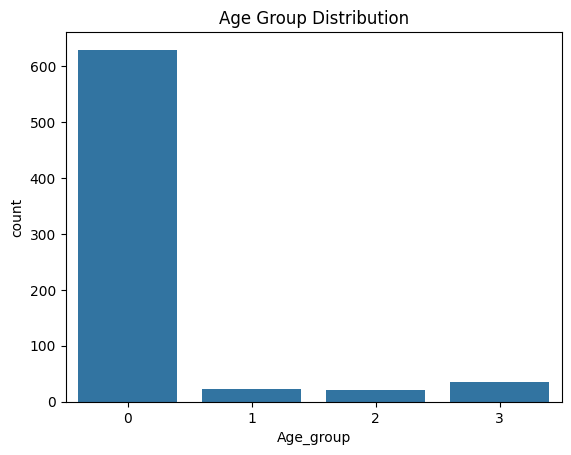

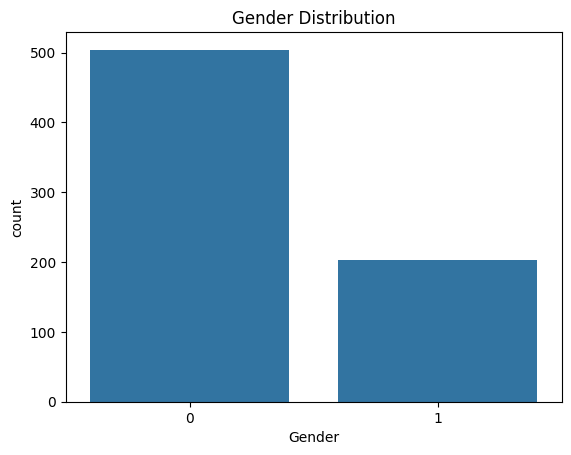

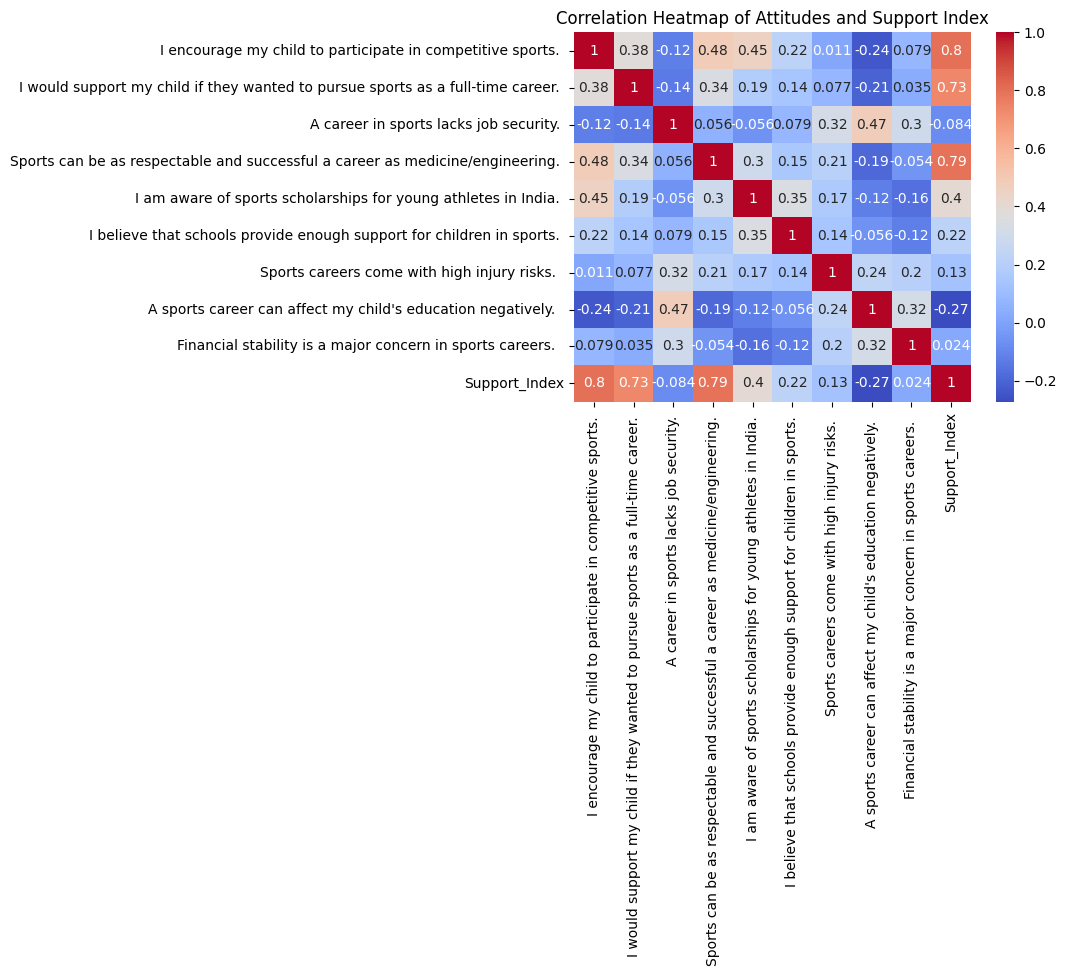

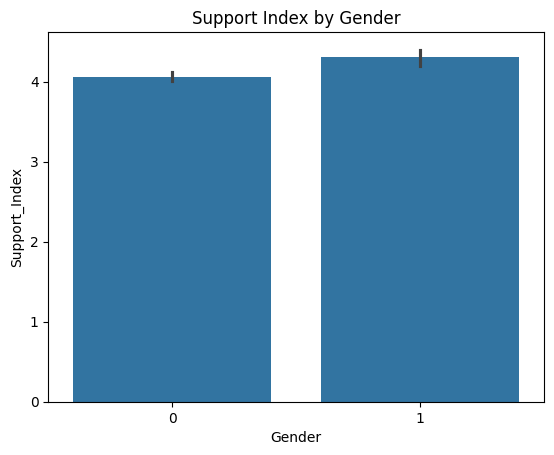

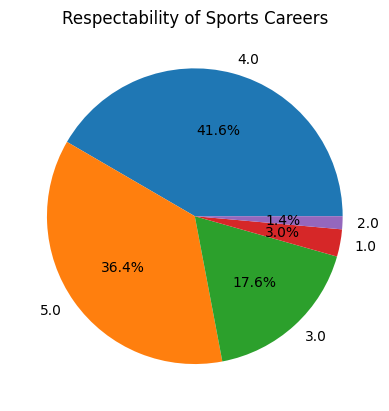

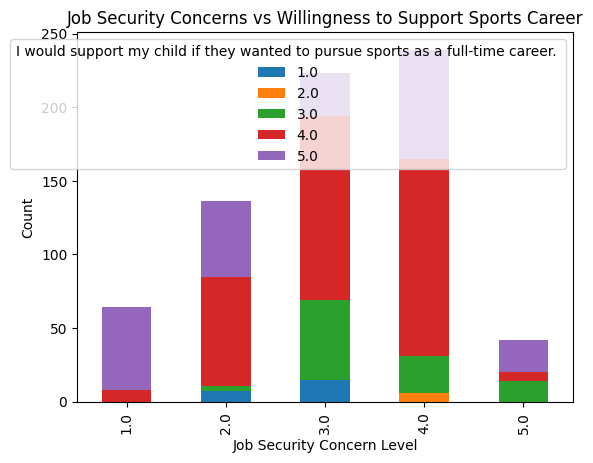

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Demographics
sns.countplot(x='Age_group', data=df)
plt.title('Age Group Distribution')
plt.show()

sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

# Correlation Heatmap for attitudes and support index (using exact column names)
attitude_cols = [
    'I encourage my child to participate in competitive sports. ',
    'I would support my child if they wanted to pursue sports as a full-time career. ',
    'A career in sports lacks job security. ',
    'Sports can be as respectable and successful a career as medicine/engineering. ',
    'I am aware of sports scholarships for young athletes in India. ',
    'I believe that schools provide enough support for children in sports. ',
    'Sports careers come with high injury risks.  ',
    "A sports career can affect my child's education negatively.  ",
    'Financial stability is a major concern in sports careers.  ',
    'Support_Index'
]

corr = df[attitude_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Attitudes and Support Index')
plt.show()

# Bar plot: Support for sports career by gender
sns.barplot(x='Gender', y='Support_Index', data=df)
plt.title('Support Index by Gender')
plt.show()

# Pie chart: Belief in sports career respectability
labels = df['Sports can be as respectable and successful a career as medicine/engineering. '].value_counts().index
sizes = df['Sports can be as respectable and successful a career as medicine/engineering. '].value_counts(normalize=True)
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Respectability of Sports Careers')
plt.show()

# Stacked bar: Job security concerns vs support for full-time sports career
pd.crosstab(df['A career in sports lacks job security. '], df['I would support my child if they wanted to pursue sports as a full-time career. ']).plot(kind='bar', stacked=True)
plt.title('Job Security Concerns vs Willingness to Support Sports Career')
plt.xlabel('Job Security Concern Level')
plt.ylabel('Count')
plt.show()


Explained variance ratio: [0.26943112 0.21070886 0.1249148 ]
Feature Loadings: [[ 0.48695973  0.38028875 -0.20041475  0.42296407  0.42040494  0.28207896
   0.03808075 -0.33802419 -0.16482313]
 [ 0.1242851   0.07489555  0.53107092  0.21410877  0.15171245  0.18623927
   0.50798211  0.4268989   0.3912477 ]
 [-0.2452999  -0.40093403  0.11133708 -0.17645737  0.3520608   0.5516631
   0.11437866  0.0813344  -0.53625551]]


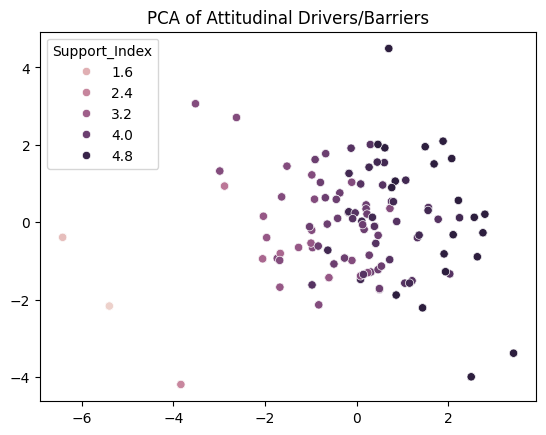

In [15]:
# Filter rows with no missing values for PCA input
X = df[likert_cols].dropna()

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=3)
components = pca.fit_transform(X_scaled)

print(f'Explained variance ratio: {pca.explained_variance_ratio_}')
print('Feature Loadings:', pca.components_)

# Prepare hue variable matching PCA rows only
support_index_filtered = df.loc[X.index, 'Support_Index']

# PCA scatterplot with hue matching filtered rows
sns.scatterplot(x=components[:,0], y=components[:,1], hue=support_index_filtered)
plt.title('PCA of Attitudinal Drivers/Barriers')
plt.show()


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define features and target (with exact names)
target = 'I would support my child if they wanted to pursue sports as a full-time career. '

X = df[likert_cols + ['Support_Index', 'Age_group', 'Education', 'Gender']].dropna()
y = df.loc[X.index, target].astype(int)  # Ensure target is int

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Model training
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predictions & evaluation
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Save model for dashboard use (optional)
import joblib
joblib.dump(clf, 'sports_career_rf_model.pkl')


Accuracy: 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00        87
           5       1.00      1.00      1.00        58

    accuracy                           1.00       176
   macro avg       1.00      1.00      1.00       176
weighted avg       1.00      1.00      1.00       176



['sports_career_rf_model.pkl']

Top variables influencing PC1:
I encourage my child to participate in competitive sports.                          0.486960
Sports can be as respectable and successful a career as medicine/engineering.       0.422964
I am aware of sports scholarships for young athletes in India.                      0.420405
I would support my child if they wanted to pursue sports as a full-time career.     0.380289
A sports career can affect my child's education negatively.                         0.338024
Name: PC1, dtype: float64 

Top variables influencing PC2:
A career in sports lacks job security.                                            0.531071
Sports careers come with high injury risks.                                       0.507982
A sports career can affect my child's education negatively.                       0.426899
Financial stability is a major concern in sports careers.                         0.391248
Sports can be as respectable and successful a career as medicine/engineering.    

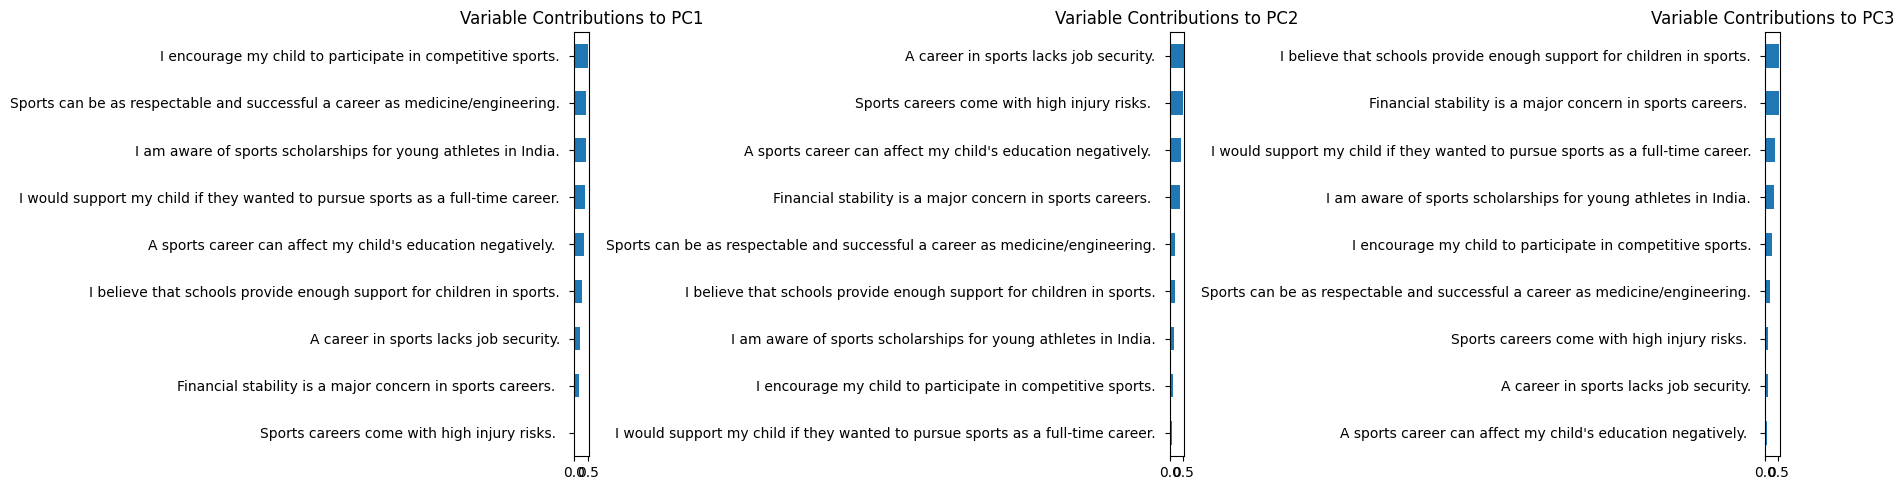

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Using PCA and scaler from previous module

# Create a DataFrame of PCA loadings for each component
loadings = pd.DataFrame(pca.components_.T, index=likert_cols, columns=['PC1', 'PC2', 'PC3'])

# Sort loadings magnitude for each component
for col in loadings.columns:
    sorted_loadings = loadings[col].abs().sort_values(ascending=False)
    print(f"Top variables influencing {col}:")
    print(sorted_loadings.head(5), '\n')

# Visualization: Bar plot of variable contributions for each PC
fig, axes = plt.subplots(1, 3, figsize=(18,5))
for i, col in enumerate(loadings.columns):
    sorted_loadings = loadings[col].abs().sort_values(ascending=True)
    sorted_loadings.plot(kind='barh', ax=axes[i], title=f'Variable Contributions to {col}')
plt.tight_layout()
plt.show()


In [18]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import numpy as np
import pandas as pd
import joblib

model = joblib.load('sports_career_rf_model.pkl')

likert_cols = [
    'I encourage my child to participate in competitive sports. ',
    'I would support my child if they wanted to pursue sports as a full-time career. ',
    'A career in sports lacks job security. ',
    'Sports can be as respectable and successful a career as medicine/engineering. ',
    'I am aware of sports scholarships for young athletes in India. ',
    'I believe that schools provide enough support for children in sports. ',
    'Sports careers come with high injury risks.  ',
    "A sports career can affect my child's education negatively.  ",
    'Financial stability is a major concern in sports careers.  '
]

likert_widgets = []
for question in likert_cols:
    lbl = widgets.Label(value=question.strip())
    slider = widgets.IntSlider(value=3, min=1, max=5, description='', continuous_update=False)
    likert_widgets.extend([lbl, slider])

age_group_dropdown = widgets.Dropdown(
    options=[('Below 30', 0), ('31 - 40', 1), ('41 - 50', 2), ('Above 50', 3), ('Schooling', 4)],
    description='Age Group:',
)

gender_dropdown = widgets.Dropdown(
    options=[('Male', 0), ('Female', 1)],
    description='Gender:',
)

education_int = widgets.BoundedIntText(
    value=0,
    min=0,
    max=10,
    step=1,
    description='Education Level:',
)

output = widgets.Output()
predict_button = widgets.Button(description="Predict Support")

def on_predict_clicked(b):
    with output:
        clear_output()
        
        likert_values = [likert_widgets[i].value for i in range(1, len(likert_widgets), 2)]
        
        support_index = np.mean([likert_values[0], likert_values[1], likert_values[3]])
        
        input_data = likert_values + [support_index, age_group_dropdown.value, education_int.value, gender_dropdown.value]
        feature_cols = likert_cols + ['Support_Index', 'Age_group', 'Education', 'Gender']
        input_df = pd.DataFrame([input_data], columns=feature_cols)
        
        probs = model.predict_proba(input_df)[0]
        
        support_classes = [3, 4]
        
        support_prob = sum([probs[c] for c in support_classes])
        
        if support_prob >= 0.5:
            prediction_text = "Would SUPPORT sports career"
        else:
            prediction_text = "UNLIKELY to support sports career"
        
        confidence = support_prob if support_prob >= 0.5 else 1 - support_prob
        display(probs)
        print(f"Prediction: {prediction_text}")
        print(f"Confidence: {confidence * 100:.2f}")

predict_button.on_click(on_predict_clicked)

dashboard_widgets = widgets.VBox(
    likert_widgets + [age_group_dropdown, gender_dropdown, education_int, predict_button, output]
)

display(dashboard_widgets)
